<a href="https://colab.research.google.com/github/Marteldelfer/PISI3/blob/analise-exploratoria/Analise_exploratoria_TMDB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TMDB

Neste trabalhos usaremos uma base de dados do TMDB para resolver problemas usando Inteligência Artificial. O TMDB é uma base de dados online muito completa que trata sobre filmes.

Esta análise toma como base a metodologia KDD que é um processo de várias etapas, flexível e interativo, para descobrir padrões novos, válidos, úteis e fáceis de entender em um conjunto de dados.

Esta metodologia consiste em cinco etapas: Seleção,Pré-Processamento,Transformação, Mineiração dos dados, Interpretação. O desenvolvimento de cada etapa fica disposto a seguir


## Seleção

A fase de seleção no KDD (Knowledge Discovery in Databases — Descoberta de Conhecimento em Bases de Dados) é a parte em que os atributos para a análise são escolhidos.

Mas antes disso, se faz necessário a importação do dataset e listagem dos atributos.

In [1]:
''' Importando dependências '''

import pandas as pd


In [3]:
'''Lendo csv e listando atributos'''

tmdb_df = pd.read_csv('TMDB_all_movies.csv')
tmdb_df.describe()


,id,vote_average,vote_count,revenue,runtime,budget,popularity,imdb_rating,imdb_votes
count,1.090315e+06,1.090313e+06,1.090313e+06,1.090313e+06,1.090313e+06,1.090313e+06,1.090313e+06,446114.000000,4.461140e+05
mean,7.677656e+05,2.059923e+00,2.269640e+01,7.847183e+05,4.478029e+01,3.060094e+05,1.202150e+00,6.247975,2.808404e+03
std,4.239017e+05,3.078309e+00,3.608879e+02,1.912606e+07,5.801035e+01,5.239084e+06,2.970237e+00,1.322068,3.184735e+04
min,2.000000e+00,0.000000e+00,0.000000e+00,-1.200000e+01,0.000000e+00,0.000000e+00,0.000000e+00,1.000000,5.000000e+00
25%,4.075925e+05,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,6.000000e-01,5.500000,2.000000e+01
50%,7.646600e+05,0.000000e+00,0.000000e+00,0.000000e+00,2.200000e+01,0.000000e+00,6.030000e-01,6.300000,5.900000e+01
75%,1.151392e+06,5.000000e+00,1.000000e+00,0.000000e+00,8.500000e+01,0.000000e+00,1.256000e+00,7.100000,2.660000e+02
max,5.180730e+06,1.000000e+01,3.741700e+04,5.000000e+09,1.440000e+04,1.000000e+09,5.674906e+02,10.000000,3.038716e+06


In [4]:
tmdb_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1090315 entries, 0 to 1090314
Data columns (total 28 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   id                       1090315 non-null  int64  
 1   title                    1090302 non-null  object 
 2   vote_average             1090313 non-null  float64
 3   vote_count               1090313 non-null  float64
 4   status                   1090313 non-null  object 
 5   release_date             965338 non-null   object 
 6   revenue                  1090313 non-null  float64
 7   runtime                  1090313 non-null  float64
 8   budget                   1090313 non-null  float64
 9   imdb_id                  616716 non-null   object 
 10  original_language        1090313 non-null  object 
 11  original_title           1090303 non-null  object 
 12  overview                 894147 non-null   object 
 13  popularity               1090313 non-null 

Em seguida, os atributos status, overview,poster_path, spoken_languages e tagline não farão parte da análise e portanto serão retirados.


In [32]:
tmdb = tmdb.drop(columns=['status', 'imdb_id', 'original_title', 'overview', 'tagline', 'spoken_languages', 'poster_path'])
tmdb.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25474 entries, 2 to 1090314
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       25474 non-null  int64  
 1   title                    25472 non-null  object 
 2   vote_average             25472 non-null  float64
 3   vote_count               25472 non-null  float64
 4   release_date             23990 non-null  object 
 5   revenue                  25472 non-null  float64
 6   runtime                  25472 non-null  float64
 7   budget                   25472 non-null  float64
 8   original_language        25472 non-null  object 
 9   popularity               25472 non-null  float64
 10  genres                   23913 non-null  object 
 11  production_companies     21741 non-null  object 
 12  production_countries     22197 non-null  object 
 13  cast                     24228 non-null  object 
 14  director                 

In [29]:
tmdb = tmdb_df[tmdb_df['status'] == 'Released']
tmdb = tmdb_df[tmdb_df['budget'] != 0]
tmdb = tmdb_df[tmdb_df['revenue'] != 0]
tmdb.head()

,id,title,vote_average,vote_count,status,release_date,revenue,runtime,budget,imdb_id,...,spoken_languages,cast,director,director_of_photography,writers,producers,music_composer,imdb_rating,imdb_votes,poster_path
2,5,Four Rooms,5.862,2688.0,Released,1995-12-09,4257354.0,98.0,4000000.0,tt0113101,...,English,"David Proval, Salma Hayek Pinault, Paul Calder...","Allison Anders, Alexandre Rockwell, Quentin Ta...","Phil Parmet, Andrzej Sekula, Guillermo Navarro...","Allison Anders, Alexandre Rockwell, Quentin Ta...","Alexandre Rockwell, Quentin Tarantino, Lawrenc...",Combustible Edison,6.7,114105.0,/75aHn1NOYXh4M7L5shoeQ6NGykP.jpg
3,6,Judgment Night,6.500,349.0,Released,1993-10-15,12136938.0,109.0,21000000.0,tt0107286,...,English,"Doug Wert, Hank McGill, Christine Harnos, Raic...",Stephen Hopkins,Peter Levy,"Lewis Colick, Jere Cunningham","Gene Levy, Marilyn Vance, Lloyd Segan",Alan Silvestri,6.6,19891.0,/3rvvpS9YPM5HB2f4HYiNiJVtdam.jpg
6,11,Star Wars,8.204,21112.0,Released,1977-05-25,775398007.0,121.0,11000000.0,tt0076759,...,English,"Ted Burnett, Jerry Walter, James Earl Jones, T...",George Lucas,Gilbert Taylor,George Lucas,"Rick McCallum, George Lucas, Gary Kurtz",John Williams,8.6,1505380.0,/6FfCtAuVAW8XJjZ7eWeLibRLWTw.jpg
7,12,Finding Nemo,7.800,19622.0,Released,2003-05-30,940335536.0,100.0,94000000.0,tt0266543,...,English,"Ellen DeGeneres, Geoffrey Rush, Eric Bana, Geo...",Andrew Stanton,"Jeremy Lasky, Sharon Calahan","Adam Bronstein, Bob Peterson, Jim Capobianco, ...","Graham Walters, John Lasseter",Thomas Newman,8.2,1158587.0,/eHuGQ10FUzK1mdOY69wF5pGgEf5.jpg
8,13,Forrest Gump,8.468,28113.0,Released,1994-06-23,677387716.0,142.0,55000000.0,tt0109830,...,English,"Margo Moorer, Joe Stefanelli, Ed Davis, Elizab...",Robert Zemeckis,Don Burgess,"Winston Groom, Eric Roth","Wendy Finerman, Steve Tisch, Steve Starkey",Alan Silvestri,8.8,2375129.0,/arw2vcBveWOVZr6pxd9XTd1TdQa.jpg


Retirando registros com campos nulos

In [60]:
tmdb_clean_df = tmdb.dropna(subset=['title', 'genres', 'imdb_rating', 'imdb_votes', 'release_date'])
tmdb_clean_df.tail()

tmdb_clean_df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 12032 entries, 2 to 1088184
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       12032 non-null  int64  
 1   title                    12032 non-null  object 
 2   vote_average             12032 non-null  float64
 3   vote_count               12032 non-null  float64
 4   release_date             12032 non-null  object 
 5   revenue                  12032 non-null  float64
 6   runtime                  12032 non-null  float64
 7   budget                   12032 non-null  float64
 8   original_language        12032 non-null  object 
 9   popularity               12032 non-null  float64
 10  genres                   12032 non-null  object 
 11  production_companies     11629 non-null  object 
 12  production_countries     11781 non-null  object 
 13  cast                     11983 non-null  object 
 14  director                 

Resetando id

In [33]:
tmdb_clean_df.reset_index(drop=True, inplace=True)
tmdb_clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20016 entries, 0 to 20015
Data columns (total 28 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       20016 non-null  int64  
 1   title                    20016 non-null  object 
 2   vote_average             20016 non-null  float64
 3   vote_count               20016 non-null  float64
 4   status                   20016 non-null  object 
 5   release_date             20016 non-null  object 
 6   revenue                  20016 non-null  float64
 7   runtime                  20016 non-null  float64
 8   budget                   20016 non-null  float64
 9   imdb_id                  20016 non-null  object 
 10  original_language        20016 non-null  object 
 11  original_title           20016 non-null  object 
 12  overview                 19725 non-null  object 
 13  popularity               20016 non-null  float64
 14  tagline               


## Pré-processamento


Em seguida os filmes que ainda não foram lançados,ou seja, os filmes rumorados, em produção ou cancelados  são retirados. Pois não devem ser considerados nesta análise.Além disso, serão tirados filmes como o orçamento e arrecadação iguais a 0.




In [21]:

tmdb = tmdb_df[tmdb_df['status'] == 'Released']
tmdb = tmdb_df[tmdb_df['budget'] != 0]
tmdb = tmdb_df[tmdb_df['revenue'] != 0]
tmdb.info()


<class 'pandas.core.frame.DataFrame'>
Index: 25474 entries, 2 to 1090314
Data columns (total 28 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       25474 non-null  int64  
 1   title                    25472 non-null  object 
 2   vote_average             25472 non-null  float64
 3   vote_count               25472 non-null  float64
 4   status                   25472 non-null  object 
 5   release_date             23990 non-null  object 
 6   revenue                  25472 non-null  float64
 7   runtime                  25472 non-null  float64
 8   budget                   25472 non-null  float64
 9   imdb_id                  21339 non-null  object 
 10  original_language        25472 non-null  object 
 11  original_title           25472 non-null  object 
 12  overview                 23791 non-null  object 
 13  popularity               25472 non-null  float64
 14  tagline                  

In [38]:
tmdb_clean_df = tmdb_clean_df[tmdb_clean_df['budget'] != 0]
tmdb_clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12032 entries, 0 to 20015
Data columns (total 28 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       12032 non-null  int64  
 1   title                    12032 non-null  object 
 2   vote_average             12032 non-null  float64
 3   vote_count               12032 non-null  float64
 4   status                   12032 non-null  object 
 5   release_date             12032 non-null  object 
 6   revenue                  12032 non-null  float64
 7   runtime                  12032 non-null  float64
 8   budget                   12032 non-null  float64
 9   imdb_id                  12032 non-null  object 
 10  original_language        12032 non-null  object 
 11  original_title           12032 non-null  object 
 12  overview                 11911 non-null  object 
 13  popularity               12032 non-null  float64
 14  tagline                  95

Além disso, foi criado o campo 'profit_percentage' que diz qual a razão entre o orçamento e arrecadação


In [41]:
tmdb_clean_df['profit_percentage'] = (((tmdb_clean_df['revenue'] - tmdb_clean_df['budget']) / tmdb_df['budget']) * 100)



Com este novo campo, foi montada uma matriz de correlação levando em conta os atributos numéricos


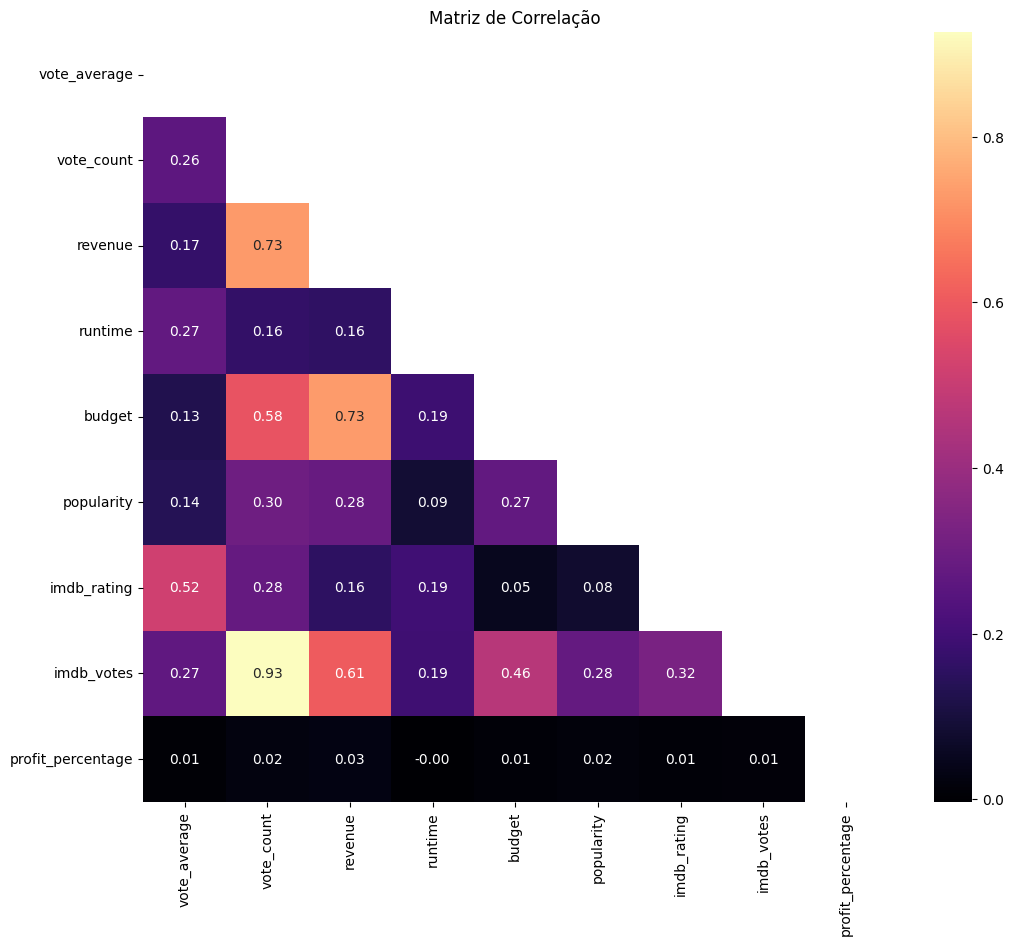

In [59]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Seleciona apenas colunas numéricas, excluindo 'id'
numeric_cols = tmdb_clean_df.select_dtypes(include=['number']).drop(columns=['id'], errors='ignore')

# Calcula a matriz de correlação
correlation_matrix = numeric_cols.corr()

# Plota o mapa de calor da matriz de correlação com máscara para o triângulo superior
plt.figure(figsize=(12, 10))
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, annot=True, cmap='magma', fmt=".2f", mask=mask)
plt.title('Matriz de Correlação')
plt.show()
